In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [306]:
art_df = pd.read_csv('Data/recsys_articles.csv')
cus_df = pd.read_csv('Data/recsys_customers.csv')
tra_df = pd.read_csv('Data/recsys_transactions.csv')

In [307]:
art_df.head()

,article_id,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
0,0,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
1,1,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
2,2,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
3,3,200 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
4,4,Control Top 50 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


In [308]:
cus_df.head()

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
2,2,0,0,29.0
3,3,0,0,21.0
4,4,0,0,23.0


In [309]:
tra_df.head()

,t_dat,customer_id,article_id
0,2020-09-02,7,599
1,2020-09-02,7,2600
2,2020-09-02,7,2063
3,2020-09-02,7,5188
4,2020-09-02,17,5111


In [310]:
art_df.corr()

,article_id,product_type,colour_group,perceived_colour_value,perceived_colour_master,department,index_group,section,garment_group
article_id,1.000000,-0.050658,-0.074545,-0.001012,0.023247,-0.192431,-0.039236,-0.117405,-0.078475
product_type,-0.050658,1.000000,0.066269,-0.097847,-0.058400,-0.104305,0.056769,-0.210351,-0.230275
colour_group,-0.074545,0.066269,1.000000,-0.145336,-0.061252,0.019574,-0.001781,-0.013969,0.014029
perceived_colour_value,-0.001012,-0.097847,-0.145336,1.000000,-0.099237,0.093978,0.037609,0.056261,0.070385
perceived_colour_master,0.023247,-0.058400,-0.061252,-0.099237,1.000000,0.030247,-0.007794,-0.072562,-0.067764
department,-0.192431,-0.104305,0.019574,0.093978,0.030247,1.000000,0.637362,0.030296,0.084527
index_group,-0.039236,0.056769,-0.001781,0.037609,-0.007794,0.637362,1.000000,-0.228436,-0.178963
section,-0.117405,-0.210351,-0.013969,0.056261,-0.072562,0.030296,-0.228436,1.000000,0.554949
garment_group,-0.078475,-0.230275,0.014029,0.070385,-0.067764,0.084527,-0.178963,0.554949,1.000000


In [311]:
cus_df.corr()

,customer_id,fashion_news,club_member,age
customer_id,1.000000,0.005404,0.005145,0.002554
fashion_news,0.005404,1.000000,0.988353,0.063100
club_member,0.005145,0.988353,1.000000,0.065650
age,0.002554,0.063100,0.065650,1.000000


In [312]:
print("Articles dataset info:")
display(art_df.info())
print("\nArticles dataset shape:")
display(art_df.shape)

Articles dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   article_id                    6536 non-null   int64 
 1   prod_name                     6536 non-null   object
 2   product_type                  6536 non-null   int64 
 3   product_type_name             6536 non-null   object
 4   product_group_name            6536 non-null   object
 5   colour_group                  6536 non-null   int64 
 6   colour_group_name             6536 non-null   object
 7   perceived_colour_value        6536 non-null   int64 
 8   perceived_colour_value_name   6536 non-null   object
 9   perceived_colour_master       6536 non-null   int64 
 10  perceived_colour_master_name  6536 non-null   object
 11  department                    6536 non-null   int64 
 12  department_name               6536 non-null   object


None


Articles dataset shape:


(6536, 21)

In [313]:
print("Customers dataset info:")
display(cus_df.info())
print("\nCustomers dataset shape:")
display(cus_df.shape)
print()
display(cus_df.describe())

Customers dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41253 entries, 0 to 41252
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   41253 non-null  int64  
 1   fashion_news  41253 non-null  int64  
 2   club_member   41253 non-null  int64  
 3   age           41120 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.3 MB


None


Customers dataset shape:


(41253, 4)

,customer_id,fashion_news,club_member,age
count,41253.000000,41253.000000,41253.000000,41120.000000
mean,20626.000000,0.441495,0.435726,35.320696
std,11908.859664,0.496571,0.495858,12.666097
min,0.000000,0.000000,0.000000,16.000000
25%,10313.000000,0.000000,0.000000,25.000000
50%,20626.000000,0.000000,0.000000,31.000000
75%,30939.000000,1.000000,1.000000,46.000000
max,41252.000000,1.000000,1.000000,91.000000


In [314]:
print("Transactions dataset info:")
display(tra_df.info())
print("\nTransactions dataset shape:")
display(tra_df.shape)

Transactions dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369113 entries, 0 to 369112
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   t_dat        369113 non-null  object
 1   customer_id  369113 non-null  int64 
 2   article_id   369113 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.4+ MB


None


Transactions dataset shape:


(369113, 3)

26.0    2208
25.0    2193
24.0    2106
27.0    1988
23.0    1841
        ... 
85.0       5
82.0       4
81.0       4
83.0       1
91.0       1
Name: age, Length: 70, dtype: int64

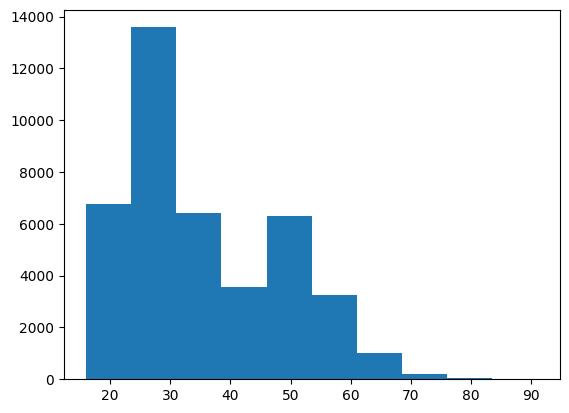

In [315]:
display(pd.value_counts(cus_df['age']))
_ = plt.hist(cus_df['age'])
plt.show()

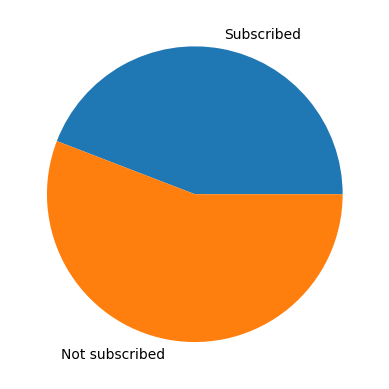

In [316]:
_ = plt.figure()
plt.pie([cus_df['fashion_news'].value_counts()[1],cus_df['fashion_news'].value_counts()[0]], labels = ['Subscribed','Not subscribed'])
plt.show()

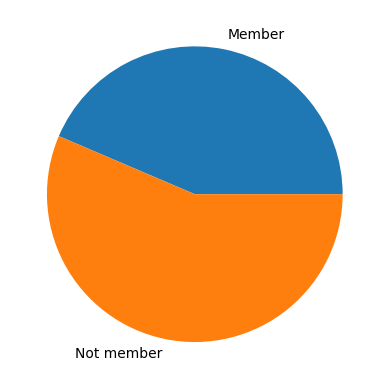

In [317]:
_ = plt.figure()
plt.pie([cus_df['club_member'].value_counts()[1],cus_df['club_member'].value_counts()[0]], labels = ['Member','Not member'])
plt.show()

In [318]:
purchaseNumber = {}
for customer in cus_df['customer_id']:
    age = cus_df.iloc[customer]['age']
    if age in purchaseNumber.keys():
        purchaseNumber[age] += tra_df['customer_id'].value_counts()[customer]
    else:
        purchaseNumber[age] = tra_df['customer_id'].value_counts()[customer]
plt.scatter(list(purchaseNumber.keys()), list(purchaseNumber.values()))
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.pairplot(cus_df, hue='age', corner=True, kind='reg')